# Uzupełnianie punktów krawędzi

### Mirosław Kuźniar, nr indeksu: 248870

In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from scipy import ndimage

In [3]:
fname = 'block.png'
image_grayscale = Image.open(fname).convert("L")
image_color = Image.open(fname)
img_gray = np.asarray(image_grayscale)
img_color = np.asarray(image_color)

##  Uzupełnianie punktów krawędzi z użyciem transformaty Hougha 

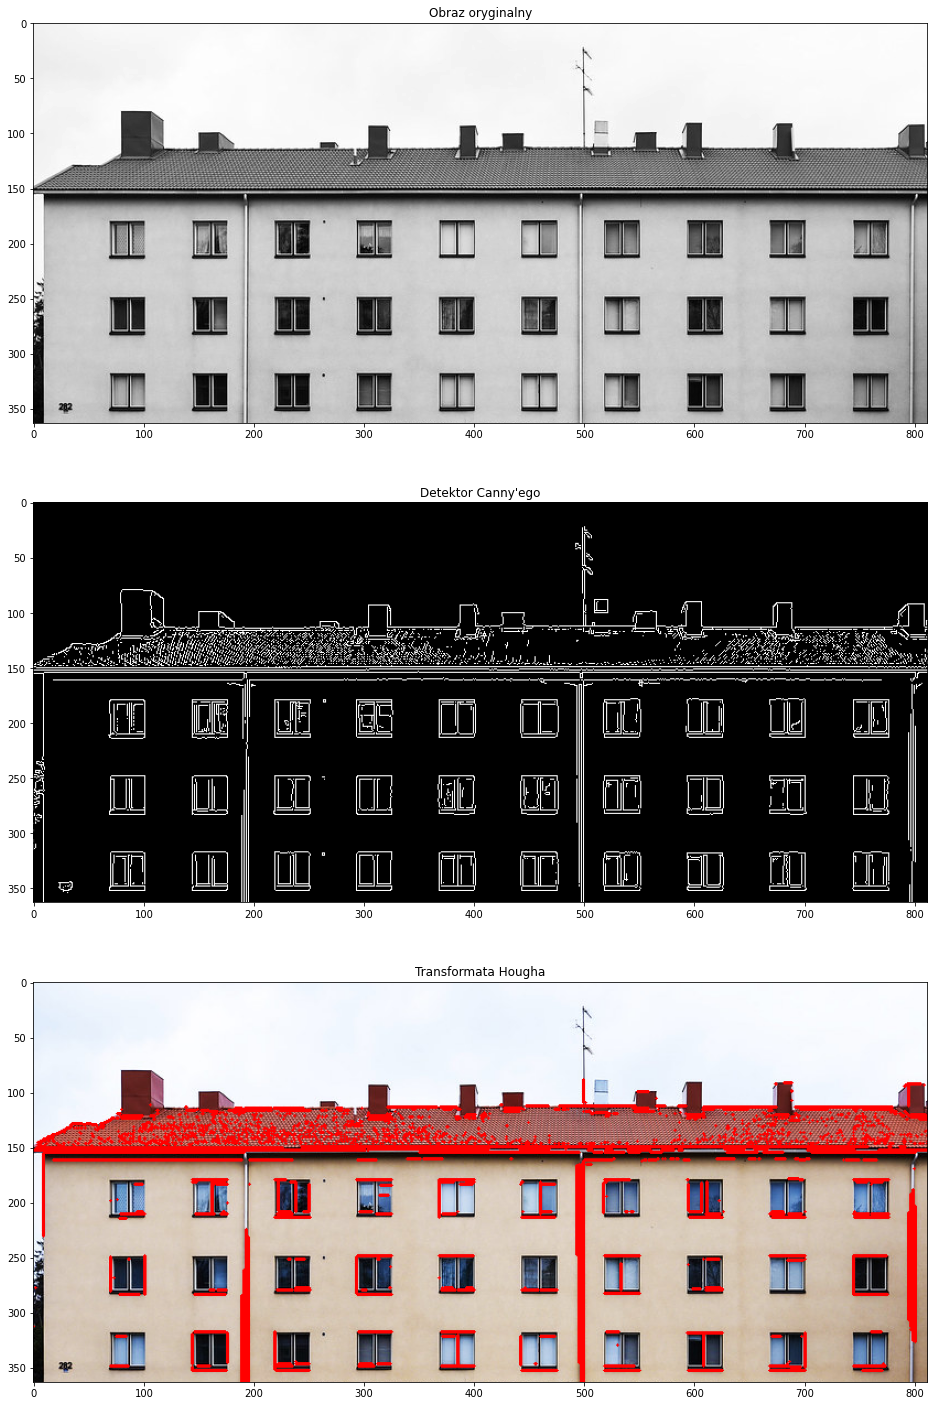

In [4]:
canny_edge = cv.Canny(img_gray, 130, 200)

lines = cv.HoughLinesP(canny_edge, rho = 1,theta = 1*np.pi/180,threshold = 80)

N = lines.shape[0]
for i in range(N):
    x1 = lines[i][0][0]
    y1 = lines[i][0][1]    
    x2 = lines[i][0][2]
    y2 = lines[i][0][3]    
    cv.line(img_color,(x1,y1),(x2,y2),(255,0,0),2)

plt.figure(figsize=(17,25))

plt.subplot(3,1,1)
plt.title("Obraz oryginalny")
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,1,2)
plt.title("Detektor Canny'ego")
plt.imshow(canny_edge, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,1,3)
plt.title("Transformata Hougha")
plt.imshow(img_color, cmap='gray', vmin=0, vmax=255)